In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [8]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
z_current = ctrl.Antecedent(np.arange(0, 5, 0.01), 'z_current')
disk_voltage = ctrl.Consequent(np.arange(0, 5, 0.01), 'disk_voltage')

disk_voltage.defuzzify_method = 'mom'

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
z_current['-overload'] = fuzz.trapmf(z_current.universe, [0, 0, 0.90, 1.00])
z_current['-nominal'] = fuzz.trapmf(z_current.universe, [0.90, 1.00, 2.30, 2.40])
z_current['turned_off'] = fuzz.trapmf(z_current.universe, [2.30, 2.40, 2.60, 2.70])
z_current['+nominal'] = fuzz.trapmf(z_current.universe, [2.60, 2.70, 4.00, 4.20])
z_current['+overload'] = fuzz.trapmf(z_current.universe, [4.00, 4.20, 5.00, 5.00])

# Output membership functions 
disk_voltage['OFF'] = fuzz.trimf(disk_voltage.universe, [0, 0, 1])
disk_voltage['ON'] = fuzz.trimf(disk_voltage.universe, [4, 5, 5])


C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


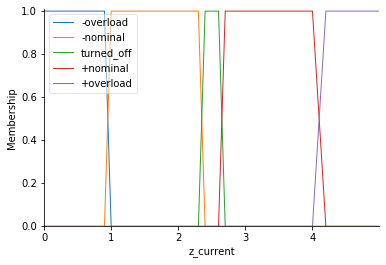

In [9]:
z_current.view()

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


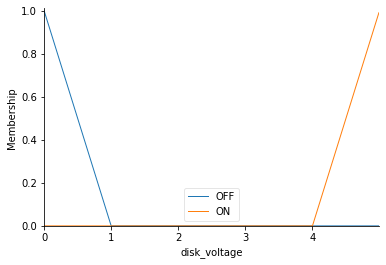

In [10]:
disk_voltage.view()

In [11]:
rule1 = ctrl.Rule(z_current['-overload'], disk_voltage['OFF'])
rule2 = ctrl.Rule(z_current['-nominal'], disk_voltage['OFF'])
rule3 = ctrl.Rule(z_current['turned_off'], disk_voltage['OFF'])
rule4 = ctrl.Rule(z_current['+nominal'], disk_voltage['ON'])
rule5 = ctrl.Rule(z_current['+overload'], disk_voltage['OFF'])


In [12]:
disk_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
disk = ctrl.ControlSystemSimulation(disk_control)

In [16]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
disk.input['z_current'] = 4
# Crunch the numbers
disk.compute()

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


4.99


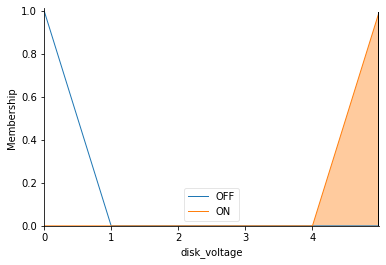

In [17]:
disk_voltage.view(sim=disk)
print(disk.output['disk_voltage'])